<small><i>June 2019 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and [license](./LICENSE.txt) info are in the folder.</i></small>

# Part II: First deep learning models

Outline:

+ Fulfilling the gaps of the method, loss and optimize classes
+ Derivative of the loss function
+ Another point of view

# Deep models

Deep models are defined as the composition or stacking of functions. For example, consider the following graph

<img src="files/pipeline2.png" width = "300">

where 

$$y_2 = f_2(f_1(x)).$$

Observe that we are just changing the model while the loss and the optimization function remains the same.

Different to the other case the parameters are arranged in layers. Thus the computation of the gradient with respect to the parameters is a little more involved. However, we will use standard chain rule. In this case we want to find 

$$\frac{\partial \mathcal{L}}{\partial \bar{\omega_2}} = \frac{\partial \mathcal{L}}{\partial y_2}\frac{\partial y_2}{\partial \bar{\omega_2}}$$
and
$$\frac{\partial \mathcal{L}}{\partial \bar{\omega_1}} = \frac{\partial \mathcal{L}}{\partial y_2}\frac{\partial y_2}{\partial \bar{y_1}}\frac{\partial \bar{y_1}}{\partial \bar{\omega_1}}$$

Observe that this decomposition allows to decouple each layer in the following terms
$$\frac{\partial \mathcal{L}}{\partial \bar{\omega_1}} = \frac{\partial \mathcal{L}}{\partial \bar{y_1}}\frac{\partial \bar{y_1}}{\partial \bar{\omega_1}}$$

In general for $N$ layers the update of the parameters of the $m$-th layer is written as 
$$\frac{\partial \mathcal{L}}{\partial \bar{\omega_m}} = \frac{\partial \mathcal{L}}{\partial \bar{y_m}}\frac{\partial \bar{y_m}}{\partial \bar{\omega_m}} = \frac{\partial \mathcal{L}}{\partial \bar{y_N}}\prod\limits_{i=m}^{N-1}\frac{\partial \bar{y_{i+1}}}{\partial \bar{y_i}} \frac{\partial \bar{y_m}}{\partial \bar{\omega_m}}$$

Thus we have to define for each layer two gradients:
+ *the gradient with respect to the parameters* is the one used for updating the parameters
+ *the gradient with respect to the layer input* is the one needed to move backward the gradient of the loss and will be used for updating lower layers.






<div class = "alert alert-success" style = "border-radius:10px;border-width:3px"><b> In pairs:</b> Think about how would you update the weights in a deep model.</div>



<div class = "alert alert-info" style = "border-radius:10px;border-width:3px"> 
<b>TAKE HOME IDEAS:</b>      
    
The algorithm that sequentially updates the weights using Stochastic Descent approaches is commonly called <b>backpropagation</b>.

And the complexity of computing the derivatives involved in the potentially complex arquitectures that we will see in the course is what <b>automatic differentiation</b> hides!</div>



## But what is deep learning about?

This is not a new technique. We are talking of good old *neural networks* with very minor changes.

A neural network is an ensemble technique. The idea is to combine very simple bricks together to build up a usually feedforward network.

The base functions are called neurons and are usually of the following form:

$$h(x) = \sigma({\bf w}^T {\bf x})$$

where $\sigma$ is a non-linear function. 

<img src = 'files/neuron.jpg' width = 400px>

And here comes the first change that helped deep learning to take off. This non-linear function was usually the sigmoid function:

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

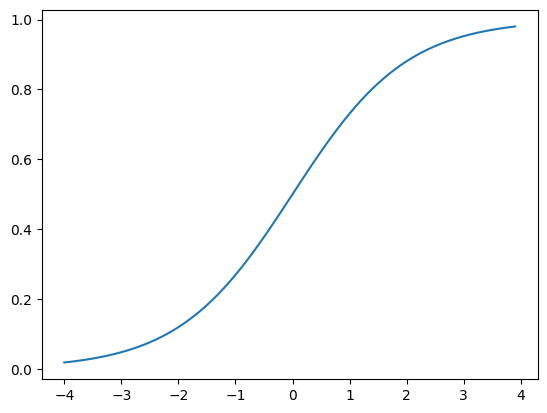

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


x = np.arange(-4,4,0.1)
sig = tf.nn.sigmoid(x)

plt.plot(x,sig.numpy())

## Moving forward to "deep" representations

We can combine multiple layers of neurons. This will create a neural network. When the number of layers is sufficently large we call the network a *deep learner*. There are different kinds of NNs. In this basic tutorial we are concerned with NN composed of fully-connected layers.

<img src = 'files/NN.jpg' width = 500px>

The definition of a deep model requires the same steps as described before. They are:

- Define the architecture (model)
- Define the loss function
- Define the optimization algorithm

# Fully connected architectures

In [2]:
data=load_digits()
X_train = data.data/16.
y_train = data.target

print(data.data.shape)

(1797, 64)


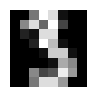

In [3]:
X_train[0,:]
plt.figure(figsize=(1,1))
plt.gray()
plt.axis('off')
plt.imshow(X_train[3,:].reshape(8,8));

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [5]:
from tensorflow.keras.callbacks import Callback
from IPython.display import clear_output

class PlotLearning(Callback):
    """
    Callback para plotear las métricas durante el entrenamiento.
    """
    def __init__(self, showLR=False, epoch_show=10):
      self.showLR = showLR                   # podemos elegir si mostrar o no el plot del learning rate en cada epoch
      self.epoch_show = epoch_show           # cada cuantas epochs muestra el plot

    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            
    def on_epoch_end(self, epoch, logs={}):
        if epoch%self.epoch_show==0:
            for metric in logs:
                if metric in self.metrics:
                    self.metrics[metric].append(logs.get(metric))
                else:
                    self.metrics[metric] = [logs.get(metric)]
            
            metric = [x for x in logs if ('val' not in x) and ('lr' not in x)]
            if self.showLR:
              metric.append('lr')
            
            f, axs = plt.subplots(1,len(metric),figsize=(10,4))
            x = [a for a in range(0,epoch+1) if a%self.epoch_show==0]
            clear_output(wait=True)            
            for i,ax in enumerate(axs):
              ax.plot(x, self.metrics[metric[i]],'o--',label=metric[i])
              try:
                ax.plot(x, self.metrics['val_' + metric[i]], 'o--', label='val_' + metric[i])
              except:
                pass
              ax.set_xlabel('# epochs')
              ax.set_ylabel(metric[i])
              ax.legend()
              ax.grid()
    
            plt.tight_layout()
            plt.show()

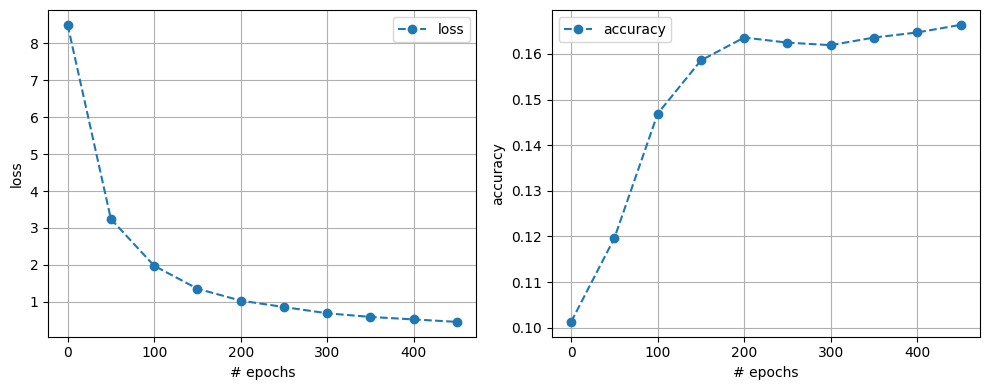

57/57 [==============================] - 0s 7ms/step - loss: 0.4589 - accuracy: 0.1664
Epoch 452/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.1658
Epoch 453/500
57/57 [==============================] - 0s 855us/step - loss: 0.4563 - accuracy: 0.1669
Epoch 454/500
57/57 [==============================] - 0s 837us/step - loss: 0.4493 - accuracy: 0.1681
Epoch 455/500
57/57 [==============================] - 0s 819us/step - loss: 0.4533 - accuracy: 0.1697
Epoch 456/500
57/57 [==============================] - 0s 946us/step - loss: 0.4462 - accuracy: 0.1703
Epoch 457/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.1664
Epoch 458/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.1669
Epoch 459/500
57/57 [==============================] - 0s 801us/step - loss: 0.4476 - accuracy: 0.1686
Epoch 460/500
57/57 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0

In [6]:
plotter_cb = PlotLearning(showLR = False, epoch_show = 50)
model.fit(X_train, y_train, epochs=500, batch_size = 32, callbacks=[plotter_cb])

In [7]:
model.evaluate(X_train,  y_train, verbose=2)

57/57 - 0s - loss: 0.4136 - accuracy: 0.1703 - 194ms/epoch - 3ms/step


[0.4136088490486145, 0.17028380930423737]

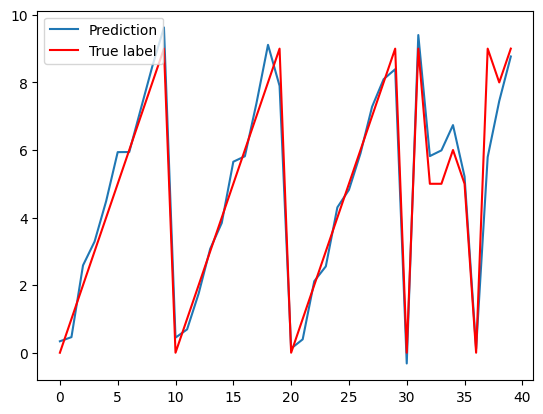

In [8]:
plt.plot(model.predict(X_train[0:40,:]),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

**Observations:** It works pretty well, check the following:
- Each layer defines the number of units/neurons. This means that the output of a layer with 100 units is a 100-dimensional vector.
- The "inner" layers use the non-linearity, but the output layer is different! **Why?**
- We introduce or use the concept of **batch** and its corresponding size in the optimization algorithm. Remember that in our current setting we approximate the true loss by a noisy approximation by considering a subset of the data instead of the full dataset at each parameter update.
- We used "mean squared error" but this is useful for regression problems. What about classification as in this case?

# New loss and activation function

**Let us fix some of these issues before moving to nowadays strategies:** For the case of the loss, we can change it to a different representation:

- The output instead of a single integer value can be split using one-hot-encoding. This can be interpreted as drawing a probability for each class. This means that the last layer must comply with the probability axioms. 

The most common technique for that is the use of soft-max layer. A **soft-max** is defined as follows:

$$\sigma(x_i) = \frac{e^x_i}{\sum_j e^{x_j}}$$

This adds up to one for all outputs and the outputs themselves are in the range $[0,1)$.

Then, if the outputs are interpreted as probabilities, it is sensible to use loss functions that optimize probability outputs. One of these is the **cross-entropy** defined as follows:

Given $t_i$ and $y_i$ the target label and the prediction of sample $i$, respectively, the cross-entropy loss is defined as,

$$\mathcal{L}(t_i,y_i) = -\sum_{c=1}^K t_i^c \log{y_i^c}, $$

where $c$ is the super-script indexing the vector component, i.e. the $c$-th component of the vector, and $K$ the number of classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

But now we have to one-hot encode the outputs...

In [10]:
oh_y_train = tf.one_hot(y_train, 10)

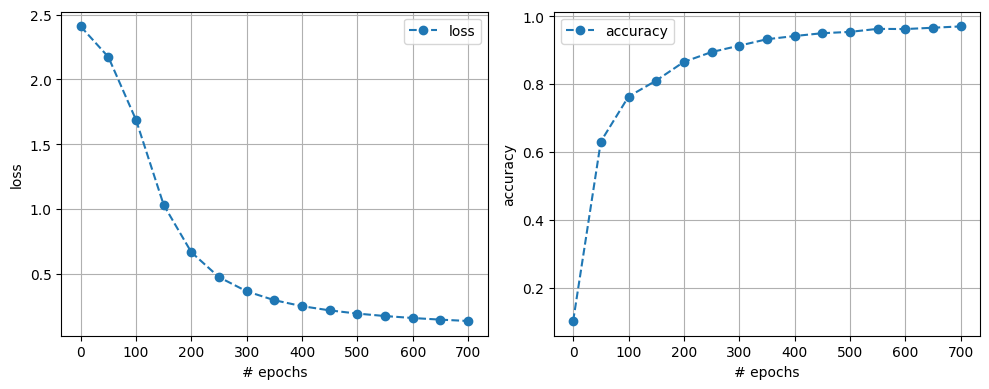

57/57 [==============================] - 0s 7ms/step - loss: 0.1346 - accuracy: 0.9699
Epoch 702/750
57/57 [==============================] - 0s 1ms/step - loss: 0.1344 - accuracy: 0.9688
Epoch 703/750
57/57 [==============================] - 0s 1ms/step - loss: 0.1343 - accuracy: 0.9688
Epoch 704/750
57/57 [==============================] - 0s 944us/step - loss: 0.1340 - accuracy: 0.9699
Epoch 705/750
57/57 [==============================] - 0s 855us/step - loss: 0.1338 - accuracy: 0.9699
Epoch 706/750
57/57 [==============================] - 0s 837us/step - loss: 0.1336 - accuracy: 0.9688
Epoch 707/750
57/57 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9683
Epoch 708/750
57/57 [==============================] - 0s 1ms/step - loss: 0.1333 - accuracy: 0.9688
Epoch 709/750
57/57 [==============================] - 0s 873us/step - loss: 0.1330 - accuracy: 0.9688
Epoch 710/750
57/57 [==============================] - 0s 890us/step - loss: 0.1329 - accuracy: 0

In [11]:
plotter_cb = PlotLearning(showLR = False, epoch_show = 50)
model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32, callbacks=[plotter_cb])

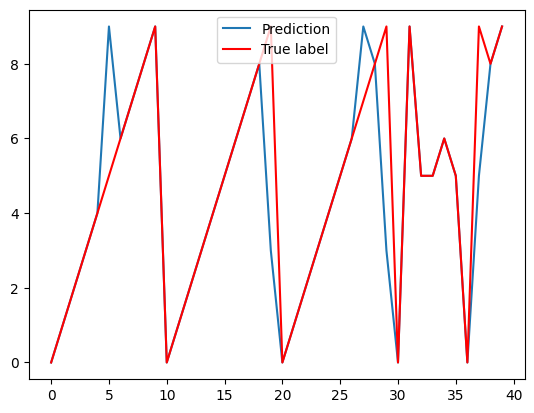

In [12]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [13]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 0s - loss: 0.1252 - accuracy: 0.9705 - 184ms/epoch - 3ms/step


[0.1252354383468628, 0.9705063700675964]

# Deep learning... deep problems

## PROBLEM 1: Dead neurons and vanishing gradients.

Let us add more layers. We will expect that we may learn even better.

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3736 - accuracy: 0.1007
Epoch 2/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3240 - accuracy: 0.0974
Epoch 3/750
57/57 [==============================] - 0s 941us/step - loss: 2.3093 - accuracy: 0.0935
Epoch 4/750
57/57 [==============================] - 0s 962us/step - loss: 2.3053 - accuracy: 0.0979
Epoch 5/750
57/57 [==============================] - 0s 962us/step - loss: 2.3042 - accuracy: 0.0963
Epoch 6/750
57/57 [==============================] - 0s 980us/step - loss: 2.3037 - accuracy: 0.0963
Epoch 7/750
57/57 [==============================] - 0s 962us/step - loss: 2.3037 - accuracy: 0.0807
Epoch 8/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3035 - accuracy: 0.0968
Epoch 9/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3036 - accuracy: 0.0863
Epoch 10/750
57/57 [==============================] - 0s 855us/step - loss: 2.3038 - accuracy: 0.09

57/57 [==============================] - 0s 623us/step - loss: 2.2921 - accuracy: 0.1603
Epoch 635/750
57/57 [==============================] - 0s 654us/step - loss: 2.2914 - accuracy: 0.1183
Epoch 636/750
57/57 [==============================] - 0s 603us/step - loss: 2.2913 - accuracy: 0.2797
Epoch 637/750
57/57 [==============================] - 0s 557us/step - loss: 2.2919 - accuracy: 0.1656
Epoch 638/750
57/57 [==============================] - 0s 634us/step - loss: 2.2908 - accuracy: 0.1546
Epoch 639/750
57/57 [==============================] - 0s 624us/step - loss: 2.2931 - accuracy: 0.1319
Epoch 640/750
57/57 [==============================] - 0s 599us/step - loss: 2.2913 - accuracy: 0.2154
Epoch 641/750
57/57 [==============================] - 0s 590us/step - loss: 2.2918 - accuracy: 0.1525
Epoch 642/750
57/57 [==============================] - 0s 638us/step - loss: 2.2903 - accuracy: 0.1837
Epoch 643/750
57/57 [==============================] - 0s 621us/step - loss: 2.2909 - a

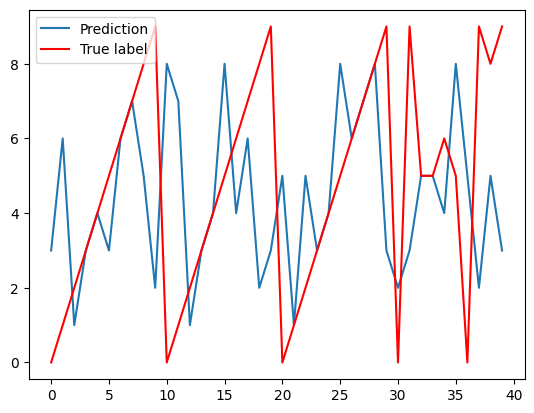

In [15]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [16]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 0s - loss: 1.5692 - accuracy: 0.4057 - 210ms/epoch - 4ms/step


[1.569230079650879, 0.40567612648010254]

<div class = "alert alert-danger" style = "border-radius:10px;border-width:3px"><b> Question: </b>What is wrong??????</div>



The problem lays in the neuron model and its working regime. This gives rise to the problem of **vanishing gradients** and **dead neurons** when learning the network. A simple way of solving this problem is to let the neuron model output to grow indefinitely on one side. The simplest model is the **Rectified Linear Unit**, i.e.

$$relu(x) = \max(0,x)$$



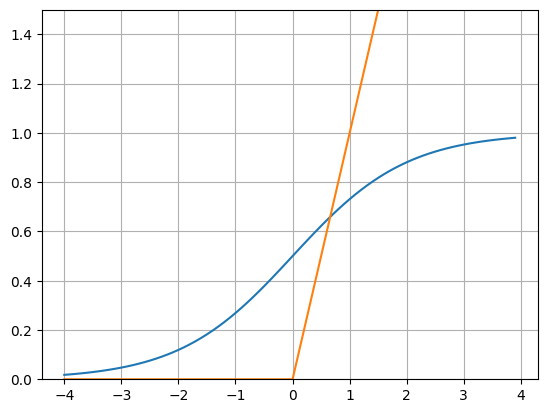

In [17]:
x = np.arange(-4,4,0.1)
rel = tf.nn.relu(x)

plt.plot(x,sig.numpy())
plt.plot(x,rel.numpy()) 
ax = plt.gca()
ax.set_ylim(0,1.5)
plt.grid('on')

Let us replace the activation with **ReLU**.

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
57/57 [==============================] - 0s 2ms/step - loss: 2.2978 - accuracy: 0.1491
Epoch 2/750
57/57 [==============================] - 0s 1ms/step - loss: 2.2573 - accuracy: 0.1981
Epoch 3/750
57/57 [==============================] - 0s 873us/step - loss: 2.2173 - accuracy: 0.2816
Epoch 4/750
57/57 [==============================] - 0s 890us/step - loss: 2.1676 - accuracy: 0.3278
Epoch 5/750
57/57 [==============================] - 0s 997us/step - loss: 2.1029 - accuracy: 0.3595
Epoch 6/750
57/57 [==============================] - 0s 944us/step - loss: 2.0150 - accuracy: 0.4162
Epoch 7/750
57/57 [==============================] - 0s 926us/step - loss: 1.8971 - accuracy: 0.4597
Epoch 8/750
57/57 [==============================] - 0s 944us/step - loss: 1.7513 - accuracy: 0.4969
Epoch 9/750
57/57 [==============================] - 0s 982us/step - loss: 1.5909 - accuracy: 0.5982
Epoch 10/750
57/57 [==============================] - 0s 997us/step - loss: 1.4173 - accuracy: 

57/57 [==============================] - 0s 558us/step - loss: 8.5743e-04 - accuracy: 1.0000
Epoch 633/750
57/57 [==============================] - 0s 608us/step - loss: 8.4231e-04 - accuracy: 1.0000
Epoch 634/750
57/57 [==============================] - 0s 610us/step - loss: 8.4479e-04 - accuracy: 1.0000
Epoch 635/750
57/57 [==============================] - 0s 528us/step - loss: 7.7515e-04 - accuracy: 1.0000
Epoch 636/750
57/57 [==============================] - 0s 611us/step - loss: 8.7808e-04 - accuracy: 1.0000
Epoch 637/750
57/57 [==============================] - 0s 633us/step - loss: 7.3551e-04 - accuracy: 1.0000
Epoch 638/750
57/57 [==============================] - 0s 609us/step - loss: 8.5113e-04 - accuracy: 1.0000
Epoch 639/750
57/57 [==============================] - 0s 551us/step - loss: 7.4433e-04 - accuracy: 1.0000
Epoch 640/750
57/57 [==============================] - 0s 642us/step - loss: 7.1731e-04 - accuracy: 1.0000
Epoch 641/750
57/57 [==============================

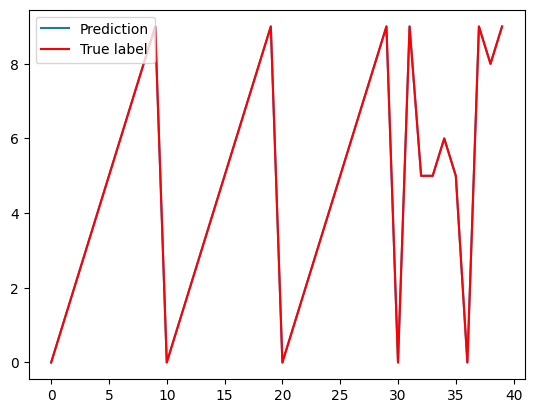

In [19]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [20]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 0s - loss: 5.7586e-04 - accuracy: 1.0000 - 182ms/epoch - 3ms/step


[0.0005758596817031503, 1.0]



<div class = "alert alert-info" style = "border-radius:10px;border-width:3px"> 
<b>TAKE HOME IDEA:</b>    

There are different non-linear activations that can be used to address the challenges of dead neurons and vanishing gradients, such as ReLU, SeLU, Leaky ReLU, etc. These units are important because they allow the signal to flow forward and the gradient to flow backwards.

</div>



## PROBLEM 2: Internal covariate shift

and we are very HAPPY and try even more deep models!!!!!

In [21]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)


Epoch 1/750
57/57 [==============================] - 1s 3ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 2/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3028 - accuracy: 0.0902
Epoch 3/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3027 - accuracy: 0.0874
Epoch 4/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3027 - accuracy: 0.0952
Epoch 5/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3027 - accuracy: 0.0946
Epoch 6/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3027 - accuracy: 0.0874
Epoch 7/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3027 - accuracy: 0.1013
Epoch 8/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.0918
Epoch 9/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.0991
Epoch 10/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1107
Epoch 11/

57/57 [==============================] - 0s 1ms/step - loss: 2.3024 - accuracy: 0.1035
Epoch 568/750
57/57 [==============================] - 0s 974us/step - loss: 2.3022 - accuracy: 0.1115
Epoch 569/750
57/57 [==============================] - 0s 990us/step - loss: 2.3023 - accuracy: 0.0999
Epoch 570/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3022 - accuracy: 0.1031
Epoch 571/750
57/57 [==============================] - 0s 987us/step - loss: 2.3023 - accuracy: 0.0994
Epoch 572/750
57/57 [==============================] - 0s 966us/step - loss: 2.3027 - accuracy: 0.0896
Epoch 573/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3024 - accuracy: 0.1048
Epoch 574/750
57/57 [==============================] - 0s 960us/step - loss: 2.3025 - accuracy: 0.1075
Epoch 575/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3017 - accuracy: 0.1183
Epoch 576/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3027 - accuracy: 0

57/57 [==============================] - 0s 957us/step - loss: 2.3023 - accuracy: 0.1078
Epoch 728/750
57/57 [==============================] - 0s 995us/step - loss: 2.3026 - accuracy: 0.1082
Epoch 729/750
57/57 [==============================] - 0s 929us/step - loss: 2.3019 - accuracy: 0.1000
Epoch 730/750
57/57 [==============================] - 0s 965us/step - loss: 2.3025 - accuracy: 0.1076
Epoch 731/750
57/57 [==============================] - 0s 989us/step - loss: 2.3024 - accuracy: 0.0984
Epoch 732/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3021 - accuracy: 0.0987
Epoch 733/750
57/57 [==============================] - 0s 942us/step - loss: 2.3031 - accuracy: 0.1059
Epoch 734/750
57/57 [==============================] - 0s 976us/step - loss: 2.3024 - accuracy: 0.1099
Epoch 735/750
57/57 [==============================] - 0s 961us/step - loss: 2.3026 - accuracy: 0.1035
Epoch 736/750
57/57 [==============================] - 0s 951us/step - loss: 2.3025 - acc

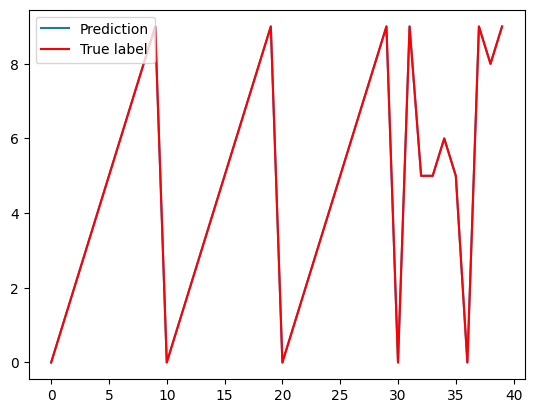

In [22]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [23]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 0s - loss: 0.0037 - accuracy: 0.9989 - 478ms/epoch - 8ms/step


[0.003680581459775567, 0.9988870620727539]

<div class = "alert alert-danger" style = "border-radius:10px;border-width:3px"><b> Question:</b> WHAT?????? WHY???? Didn't we just solved the problem?</div>



In [24]:
tf.keras.backend.clear_session()

inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dense(100, activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
57/57 [==============================] - 2s 2ms/step - loss: 2.3028 - accuracy: 0.0868
Epoch 2/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3027 - accuracy: 0.0885
Epoch 3/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3027 - accuracy: 0.0851
Epoch 4/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3027 - accuracy: 0.1007
Epoch 5/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3027 - accuracy: 0.0963
Epoch 6/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3027 - accuracy: 0.1007
Epoch 7/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3027 - accuracy: 0.0957
Epoch 8/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3027 - accuracy: 0.1018
Epoch 9/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3027 - accuracy: 0.0996
Epoch 10/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 11/

57/57 [==============================] - 0s 1ms/step - loss: 0.3265 - accuracy: 0.9113
Epoch 570/750
57/57 [==============================] - 0s 1ms/step - loss: 0.7335 - accuracy: 0.8218
Epoch 571/750
57/57 [==============================] - 0s 1ms/step - loss: 0.4200 - accuracy: 0.8877
Epoch 572/750
57/57 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.9117
Epoch 573/750
57/57 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.8766
Epoch 574/750
57/57 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.9169
Epoch 575/750
57/57 [==============================] - 0s 1ms/step - loss: 0.2896 - accuracy: 0.9172
Epoch 576/750
57/57 [==============================] - 0s 1ms/step - loss: 0.2635 - accuracy: 0.9326
Epoch 577/750
57/57 [==============================] - 0s 1ms/step - loss: 0.2800 - accuracy: 0.9344
Epoch 578/750
57/57 [==============================] - 0s 1ms/step - loss: 0.2378 - accuracy: 0.9411
Epoc

57/57 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.8891
Epoch 732/750
57/57 [==============================] - 0s 1ms/step - loss: 0.4069 - accuracy: 0.8932
Epoch 733/750
57/57 [==============================] - 0s 1ms/step - loss: 0.3549 - accuracy: 0.9045
Epoch 734/750
57/57 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.9114
Epoch 735/750
57/57 [==============================] - 0s 1ms/step - loss: 0.5835 - accuracy: 0.8650
Epoch 736/750
57/57 [==============================] - 0s 1ms/step - loss: 0.3707 - accuracy: 0.9136
Epoch 737/750
57/57 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.9134
Epoch 738/750
57/57 [==============================] - 0s 1ms/step - loss: 0.8361 - accuracy: 0.7877
Epoch 739/750
57/57 [==============================] - 0s 1ms/step - loss: 0.6134 - accuracy: 0.8431
Epoch 740/750
57/57 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.8695
Epoc

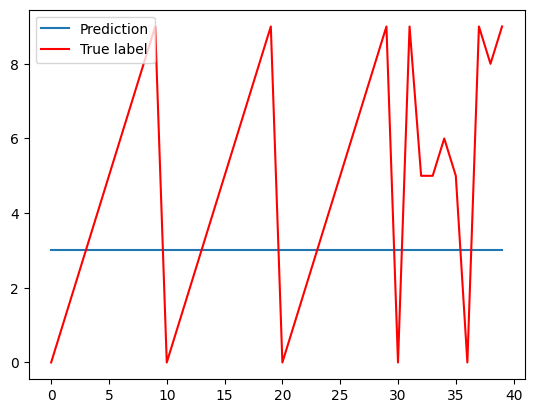

In [25]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [26]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 0s - loss: 2.3025 - accuracy: 0.1018 - 454ms/epoch - 8ms/step


[2.3024842739105225, 0.10183639079332352]

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 40)                4040      
                                                                 
 batch_normalization_1 (Batc  (None, 40)               160       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 20)                820   

In [28]:
from tensorflow.keras import backend as K

# with a Sequential model
inp = model.input  
get_1st_output = K.function(inp,[model.layers[1].output])
layer_output = get_1st_output(X_train)

(array([  4.,   9.,  19.,  43.,  53., 102., 136., 162., 155., 171., 155.,
        164., 125., 108., 111.,  71.,  56.,  44.,  25.,  27.,  14.,  10.,
         14.,  11.,   6.,   0.,   0.,   1.,   0.,   1.]),
 array([2.29875685, 2.52231977, 2.7458827 , 2.96944562, 3.19300855,
        3.41657148, 3.6401344 , 3.86369733, 4.08726025, 4.31082318,
        4.53438611, 4.75794903, 4.98151196, 5.20507488, 5.42863781,
        5.65220074, 5.87576366, 6.09932659, 6.32288951, 6.54645244,
        6.77001537, 6.99357829, 7.21714122, 7.44070414, 7.66426707,
        7.88783   , 8.11139292, 8.33495585, 8.55851877, 8.7820817 ,
        9.00564463]),
 <BarContainer object of 30 artists>)

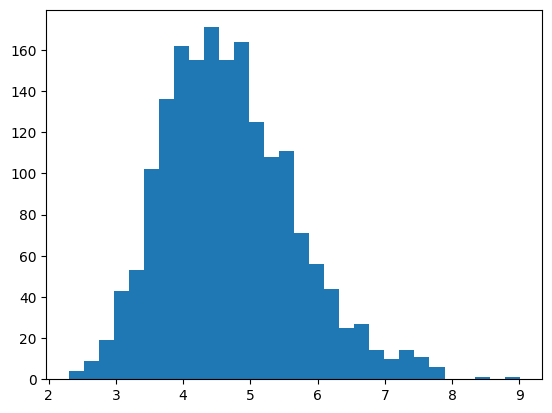

In [29]:
m = np.mean(X_train,axis=0)
plt.hist(np.sum(np.power(X_train-np.tile(m,(X_train.shape[0],1)),2),axis=1),bins=30)

In [30]:
layer_output

[array([[0.1578439 , 0.40729517, 0.23268859, ..., 0.51844764, 0.7606748 ,
         0.        ],
        [0.07178923, 0.14487362, 0.74347764, ..., 0.9205978 , 0.3007532 ,
         0.        ],
        [0.11690433, 0.1931844 , 0.09414057, ..., 0.4145492 , 0.25755703,
         0.        ],
        ...,
        [0.6049382 , 0.32022452, 0.729386  , ..., 0.979841  , 0.37834072,
         0.        ],
        [0.16371448, 0.15948184, 0.9736206 , ..., 0.83192056, 0.82491493,
         0.        ],
        [0.31749952, 0.26342818, 0.8090431 , ..., 0.85515743, 0.66235524,
         0.        ]], dtype=float32)]

(array([  4.,  16.,  28.,  70.,  98., 144., 141., 175., 169., 176., 124.,
        134., 126.,  84.,  69.,  66.,  50.,  40.,  27.,  16.,  11.,   9.,
          6.,   5.,   4.,   4.,   0.,   0.,   0.,   1.]),
 array([0.980636  , 1.12450552, 1.26837504, 1.41224456, 1.55611408,
        1.6999836 , 1.84385312, 1.98772264, 2.13159204, 2.27546167,
        2.41933107, 2.56320071, 2.70707011, 2.85093975, 2.99480915,
        3.13867879, 3.28254819, 3.42641783, 3.57028723, 3.71415687,
        3.85802627, 4.0018959 , 4.1457653 , 4.2896347 , 4.43350458,
        4.57737398, 4.72124338, 4.86511278, 5.00898266, 5.15285206,
        5.29672146]),
 <BarContainer object of 30 artists>)

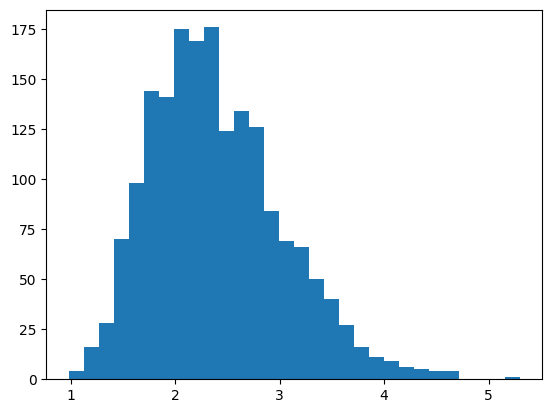

In [31]:
m = np.mean(layer_output[0],axis=0)
plt.hist(np.sum(np.power(layer_output[0]-np.tile(m,(X_train.shape[0],1)),2),axis=1),bins=30)

In [32]:
from tensorflow.keras import backend as K

# with a Sequential model
inp = model.input  
get_batch_output = K.function(inp,[model.layers[2].output])
batch_output = get_batch_output(X_train)

(array([ 24., 108., 186., 270., 267., 243., 173., 141.,  79.,  83.,  63.,
         47.,  31.,  25.,  15.,  10.,   7.,   6.,   4.,   1.,   3.,   4.,
          2.,   2.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([ 30.70063782,  39.18467712,  47.66871643,  56.15275574,
         64.63679504,  73.12083435,  81.60487366,  90.08891296,
         98.57294464, 107.05698395, 115.54102325, 124.02506256,
        132.5091095 , 140.9931488 , 149.47718811, 157.96121216,
        166.44525146, 174.92929077, 183.41333008, 191.89736938,
        200.38140869, 208.865448  , 217.3494873 , 225.83352661,
        234.31756592, 242.80160522, 251.28564453, 259.76968384,
        268.25372314, 276.73776245, 285.22180176]),
 <BarContainer object of 30 artists>)

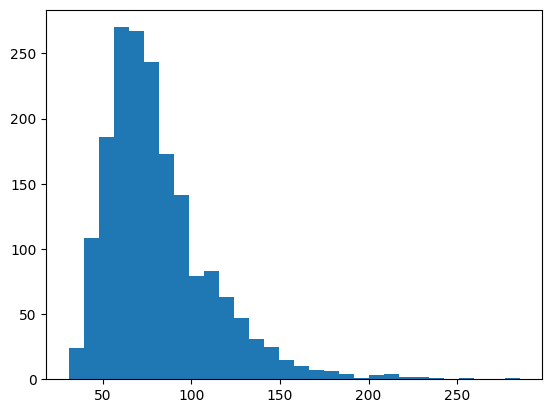

In [33]:
m = np.mean(batch_output[0],axis=0)
plt.hist(np.sum(np.power(batch_output[0]-np.tile(m,(X_train.shape[0],1)),2),axis=1),bins=30)

Sooooo... if we reset statistics can ```sigmoid``` work? **YES!!!!**

Let's check it...

In [34]:
import tensorflow as tf
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dense(100, activation="sigmoid")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
57/57 [==============================] - 6s 5ms/step - loss: 2.3028 - accuracy: 0.1336
Epoch 2/750
57/57 [==============================] - 0s 4ms/step - loss: 2.0960 - accuracy: 0.2677
Epoch 3/750
57/57 [==============================] - 0s 4ms/step - loss: 1.9676 - accuracy: 0.4174
Epoch 4/750
57/57 [==============================] - 0s 4ms/step - loss: 1.8733 - accuracy: 0.4663
Epoch 5/750
57/57 [==============================] - 0s 4ms/step - loss: 1.7934 - accuracy: 0.4936
Epoch 6/750
57/57 [==============================] - 0s 4ms/step - loss: 1.7310 - accuracy: 0.5309
Epoch 7/750
57/57 [==============================] - 0s 4ms/step - loss: 1.6642 - accuracy: 0.5815
Epoch 8/750
57/57 [==============================] - 0s 4ms/step - loss: 1.6004 - accuracy: 0.6183
Epoch 9/750
57/57 [==============================] - 0s 4ms/step - loss: 1.5373 - accuracy: 0.6784
Epoch 10/750
57/57 [==============================] - 0s 4ms/step - loss: 1.4917 - accuracy: 0.6845
Epoch 11/

57/57 [==============================] - 0s 3ms/step - loss: 0.0887 - accuracy: 0.9720
Epoch 570/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.9685
Epoch 571/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0866 - accuracy: 0.9722
Epoch 572/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9804
Epoch 573/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 0.9862
Epoch 574/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9927
Epoch 575/750
57/57 [==============================] - 0s 3ms/step - loss: 0.3903 - accuracy: 0.8796
Epoch 576/750
57/57 [==============================] - 0s 3ms/step - loss: 0.3597 - accuracy: 0.8969
Epoch 577/750
57/57 [==============================] - 0s 3ms/step - loss: 0.1804 - accuracy: 0.9571
Epoch 578/750
57/57 [==============================] - 0s 3ms/step - loss: 0.1190 - accuracy: 0.9673
Epoc

57/57 [==============================] - 0s 3ms/step - loss: 0.0711 - accuracy: 0.9818
Epoch 732/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0566 - accuracy: 0.9866
Epoch 733/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0859 - accuracy: 0.9740
Epoch 734/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0601 - accuracy: 0.9866
Epoch 735/750
57/57 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9728
Epoch 736/750
57/57 [==============================] - 0s 3ms/step - loss: 0.1580 - accuracy: 0.9581
Epoch 737/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0928 - accuracy: 0.9745
Epoch 738/750
57/57 [==============================] - 0s 3ms/step - loss: 0.1276 - accuracy: 0.9642
Epoch 739/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9822
Epoch 740/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9842
Epoc

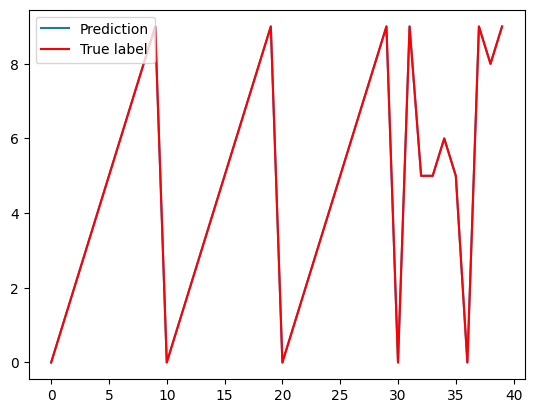

In [35]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [36]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 1s - loss: 0.0103 - accuracy: 1.0000 - 806ms/epoch - 14ms/step


[0.010278877802193165, 1.0]

# Errrrr ... btw, all the process was wrong! Where is training and test????

In [37]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

data=load_digits()
X = data.data/16.
y = data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)
print(np.shape(X_train),np.shape(X_test))

(898, 64) (899, 64)


In [38]:
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dense(100, activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
29/29 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.0835
Epoch 2/750
29/29 [==============================] - 0s 2ms/step - loss: 2.3025 - accuracy: 0.1047
Epoch 3/750
29/29 [==============================] - 0s 3ms/step - loss: 2.3024 - accuracy: 0.1047
Epoch 4/750
29/29 [==============================] - 0s 3ms/step - loss: 2.3022 - accuracy: 0.0958
Epoch 5/750
29/29 [==============================] - 0s 3ms/step - loss: 2.3021 - accuracy: 0.1125
Epoch 6/750
29/29 [==============================] - 0s 2ms/step - loss: 2.3016 - accuracy: 0.1192
Epoch 7/750
29/29 [==============================] - 0s 3ms/step - loss: 2.3016 - accuracy: 0.1024
Epoch 8/750
29/29 [==============================] - 0s 3ms/step - loss: 2.3013 - accuracy: 0.1169
Epoch 9/750
29/29 [==============================] - 0s 3ms/step - loss: 2.3009 - accuracy: 0.1047
Epoch 10/750
29/29 [==============================] - 0s 4ms/step - loss: 2.3005 - accuracy: 0.1047
Epoch 11/

29/29 [==============================] - 0s 1ms/step - loss: 0.9514 - accuracy: 0.6408
Epoch 570/750
29/29 [==============================] - 0s 2ms/step - loss: 1.0279 - accuracy: 0.5898
Epoch 571/750
29/29 [==============================] - 0s 2ms/step - loss: 0.9484 - accuracy: 0.6533
Epoch 572/750
29/29 [==============================] - 0s 2ms/step - loss: 0.7695 - accuracy: 0.7341
Epoch 573/750
29/29 [==============================] - 0s 2ms/step - loss: 0.7475 - accuracy: 0.7369
Epoch 574/750
29/29 [==============================] - 0s 2ms/step - loss: 0.8045 - accuracy: 0.6900
Epoch 575/750
29/29 [==============================] - 0s 2ms/step - loss: 0.8132 - accuracy: 0.6877
Epoch 576/750
29/29 [==============================] - 0s 1ms/step - loss: 1.3788 - accuracy: 0.5749
Epoch 577/750
29/29 [==============================] - 0s 1ms/step - loss: 1.1449 - accuracy: 0.5676
Epoch 578/750
29/29 [==============================] - 0s 1ms/step - loss: 1.1229 - accuracy: 0.5959
Epoc

29/29 [==============================] - 0s 2ms/step - loss: 1.5193 - accuracy: 0.4146
Epoch 732/750
29/29 [==============================] - 0s 2ms/step - loss: 1.5025 - accuracy: 0.4189
Epoch 733/750
29/29 [==============================] - 0s 2ms/step - loss: 1.4623 - accuracy: 0.3962
Epoch 734/750
29/29 [==============================] - 0s 2ms/step - loss: 1.4545 - accuracy: 0.4098
Epoch 735/750
29/29 [==============================] - 0s 2ms/step - loss: 1.4012 - accuracy: 0.4453
Epoch 736/750
29/29 [==============================] - 0s 2ms/step - loss: 1.4552 - accuracy: 0.4170
Epoch 737/750
29/29 [==============================] - 0s 2ms/step - loss: 1.4582 - accuracy: 0.4424
Epoch 738/750
29/29 [==============================] - 0s 2ms/step - loss: 1.4089 - accuracy: 0.4171
Epoch 739/750
29/29 [==============================] - 0s 2ms/step - loss: 1.5563 - accuracy: 0.3394
Epoch 740/750
29/29 [==============================] - 0s 1ms/step - loss: 1.4750 - accuracy: 0.4141
Epoc

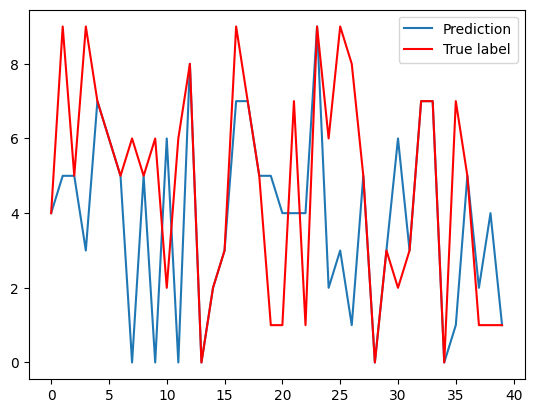

In [39]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

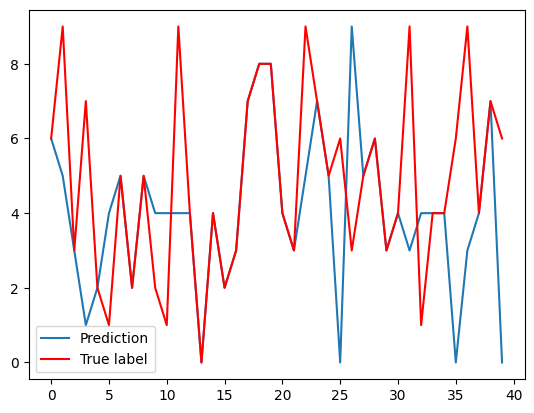

In [40]:
plt.plot(np.argmax(model.predict(X_test[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_test[0:40],color='r',label='True label')
plt.legend()

In [41]:
# Train evaluation
model.evaluate(X_train,  oh_y_train, verbose=2)

29/29 - 0s - loss: 0.8737 - accuracy: 0.6715 - 424ms/epoch - 15ms/step


[0.8736588358879089, 0.6714922189712524]

In [42]:
# Test evaluation
oh_y_test = tf.one_hot(y_test, 10)
model.evaluate(X_test,  oh_y_test, verbose=2)

29/29 - 0s - loss: 1.0504 - accuracy: 0.6218 - 58ms/epoch - 2ms/step


[1.0504225492477417, 0.621802031993866]

You are making me crazy... now what!!!!!!!!



<div class = "alert alert-warning" style = "border-radius:10px;border-width:3px"> 
<b>TAKE HOME IDEA:</b>    

I am sure you know about Probably Approximately Correct (PAC) learning and concentration of measure inequalities and the trade-off between complexity and number of samples. In this case, we have very few samples. How can we synthetically "augment data". Enter the dragon! ... ops... Enter the <b>dropout</b>!

</div>



In [43]:
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dropout(0.1)(inputs)
x = tf.keras.layers.Dense(100, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
29/29 [==============================] - 2s 2ms/step - loss: 2.3027 - accuracy: 0.0824
Epoch 2/750
29/29 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1002
Epoch 3/750
29/29 [==============================] - 0s 3ms/step - loss: 2.3025 - accuracy: 0.0991
Epoch 4/750
29/29 [==============================] - 0s 2ms/step - loss: 2.3025 - accuracy: 0.0969
Epoch 5/750
29/29 [==============================] - 0s 2ms/step - loss: 2.3025 - accuracy: 0.1036
Epoch 6/750
29/29 [==============================] - 0s 3ms/step - loss: 2.3024 - accuracy: 0.1036
Epoch 7/750
29/29 [==============================] - 0s 2ms/step - loss: 2.3024 - accuracy: 0.1036
Epoch 8/750
29/29 [==============================] - 0s 2ms/step - loss: 2.3023 - accuracy: 0.1036
Epoch 9/750
29/29 [==============================] - 0s 2ms/step - loss: 2.3023 - accuracy: 0.0980
Epoch 10/750
29/29 [==============================] - 0s 3ms/step - loss: 2.3022 - accuracy: 0.1024
Epoch 11/

29/29 [==============================] - 0s 2ms/step - loss: 0.9977 - accuracy: 0.6076
Epoch 570/750
29/29 [==============================] - 0s 2ms/step - loss: 1.1243 - accuracy: 0.5622
Epoch 571/750
29/29 [==============================] - 0s 2ms/step - loss: 0.8769 - accuracy: 0.6706
Epoch 572/750
29/29 [==============================] - 0s 2ms/step - loss: 0.9877 - accuracy: 0.6248
Epoch 573/750
29/29 [==============================] - 0s 2ms/step - loss: 0.9862 - accuracy: 0.6420
Epoch 574/750
29/29 [==============================] - 0s 2ms/step - loss: 1.0768 - accuracy: 0.6017
Epoch 575/750
29/29 [==============================] - 0s 2ms/step - loss: 1.1139 - accuracy: 0.5856
Epoch 576/750
29/29 [==============================] - 0s 2ms/step - loss: 0.9882 - accuracy: 0.6048
Epoch 577/750
29/29 [==============================] - 0s 2ms/step - loss: 0.9630 - accuracy: 0.6319
Epoch 578/750
29/29 [==============================] - 0s 2ms/step - loss: 1.0537 - accuracy: 0.6057
Epoc

29/29 [==============================] - 0s 2ms/step - loss: 1.0008 - accuracy: 0.6558
Epoch 732/750
29/29 [==============================] - 0s 2ms/step - loss: 1.2561 - accuracy: 0.6196
Epoch 733/750
29/29 [==============================] - 0s 2ms/step - loss: 0.9433 - accuracy: 0.6924
Epoch 734/750
29/29 [==============================] - 0s 2ms/step - loss: 1.0956 - accuracy: 0.6179
Epoch 735/750
29/29 [==============================] - 0s 2ms/step - loss: 1.0942 - accuracy: 0.6387
Epoch 736/750
29/29 [==============================] - 0s 2ms/step - loss: 1.1959 - accuracy: 0.5966
Epoch 737/750
29/29 [==============================] - 0s 2ms/step - loss: 1.0690 - accuracy: 0.6163
Epoch 738/750
29/29 [==============================] - 0s 2ms/step - loss: 1.1771 - accuracy: 0.6025
Epoch 739/750
29/29 [==============================] - 0s 2ms/step - loss: 1.0075 - accuracy: 0.6373
Epoch 740/750
29/29 [==============================] - 0s 2ms/step - loss: 0.9942 - accuracy: 0.6612
Epoc

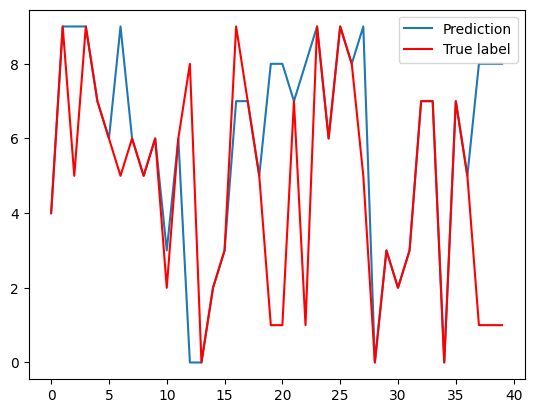

In [44]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [45]:
model.evaluate(X_train,  oh_y_train, verbose=2)

29/29 - 0s - loss: 0.7493 - accuracy: 0.7550 - 407ms/epoch - 14ms/step


[0.7493038773536682, 0.7550111413002014]

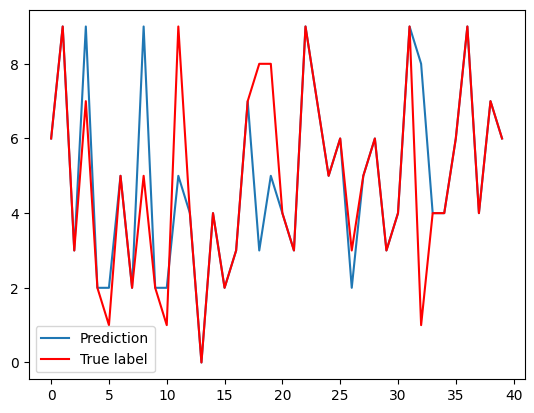

In [46]:
plt.plot(np.argmax(model.predict(X_test[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_test[0:40],color='r',label='True label')
plt.legend()

In [47]:
oh_y_test = tf.one_hot(y_test, 10)

model.evaluate(X_test,  oh_y_test, verbose=2)

29/29 - 0s - loss: 0.8393 - accuracy: 0.7208 - 57ms/epoch - 2ms/step


[0.8393092155456543, 0.7208008766174316]



<div class = "alert alert-success" style = "border-radius:10px;border-width:3px"> 
<b>Oh my ... This is just AWESOME!!!!! We recovered some prediction power!!!!</b>    
</div>



# Interpreting deep learning as feature representations 



<div class = "alert alert-info" style = "border-radius:10px;border-width:3px"> 
<b>THE FINAL AND MOST IMPORTANT TAKE HOME IDEA:</b>    
    
Deep learning is all about learning representations. As a classifier it is a fiasco. But then... how does it work so well? Because all layers up to the last one can be interpreted as transformations of the data. And just the last layer is the classification step. For examples in the case of soft-max the decision boundary is linear. This is a really simple classifier, thus if the network is to work well the transformation must be such that a linear classifier is able to perform well enough.

<b>This is really what deep learning is about!</b>
</div>



Let us check this out. We will recover a relative ok classification such as the last model trained, slice the last layer, and replace it with a real classifier... and see what happens.

First, let us access the last layer representation:

In [48]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 40)                4040      
                                                                 
 batch_normalization_1 (Batc  (None, 40)               160       
 hNormalization)                                             

In [49]:
from tensorflow.keras import backend as K

# with a Sequential model
inp = model.input  
get_batch_output = K.function(inp,[model.layers[0].output])
batch_output = get_batch_output(X_train)

In [50]:
batch_output

[array([[0.    , 0.    , 0.    , ..., 0.375 , 0.    , 0.    ],
        [0.    , 0.    , 0.5625, ..., 0.375 , 0.    , 0.    ],
        [0.    , 0.0625, 0.5   , ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.5625, ..., 1.    , 0.125 , 0.    ],
        [0.    , 0.    , 0.0625, ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.0625, ..., 0.0625, 0.    , 0.    ]],
       dtype=float32)]

In [51]:
from sklearn import ensemble

clf = ensemble.RandomForestClassifier(101)
clf.fit(batch_output[0],y_train)

RandomForestClassifier(n_estimators=101)

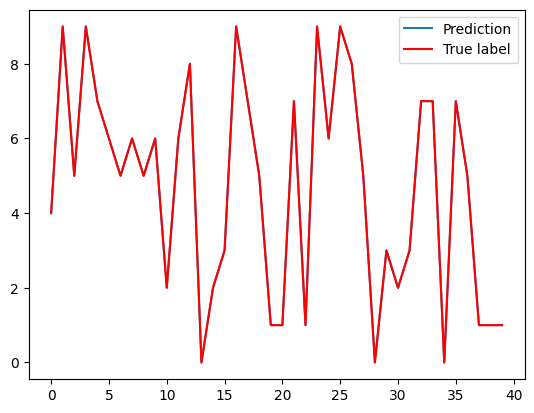

In [52]:
bo = batch_output[0]
plt.plot(clf.predict(bo[0:40,:]),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [53]:
np.mean(np.where(np.abs(clf.predict(bo)-y_train)<1e-6,1.,0.))

1.0

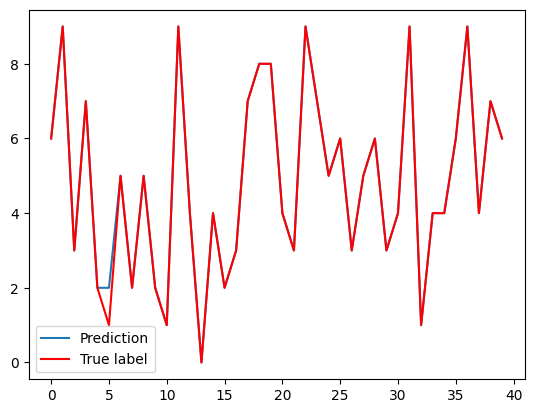

In [54]:
batch_output = get_batch_output(X_test)

bo = batch_output[0]
plt.plot(clf.predict(bo[0:40,:]),label = 'Prediction')
plt.plot(y_test[0:40],color='r',label='True label')
plt.legend()

In [55]:
np.mean(np.where(np.abs(clf.predict(bo)-y_test)<1e-6,1.,0.))

0.9632925472747497

# Recap exercise

<div class = "alert alert-success" style = "border-radius:10px;border-width:3px"> 
<b>EXERCISE: </b> It is your turn to code a deep feed forward neural network to solve the problem of classifying fashion images.
    
<b>RULES: </b> Solve the problem with maximum accuracy but with the smallest amount of <b>trainable parameters</b>. To check the amount of parameters use ```model.summary()```.
</div>

In [56]:
#Load data set
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Label:9
Number of unique labels: [0 1 2 3 4 5 6 7 8 9]
Data set size: (60000, 28, 28)


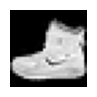

In [57]:
%matplotlib inline

#Check some basic info
plt.figure(figsize =(1,1))
plt.imshow(train_images[0],cmap='gray')
plt.axis('off')
print('Label:'+str(train_labels[0]))
print('Number of unique labels: '+str(np.unique(train_labels)))
print('Data set size: ' + str(train_images.shape))

In [58]:
#Rasterize data
X_train = np.reshape(train_images,(train_images.shape[0],train_images.shape[1]*train_images.shape[2]))
y_train = train_labels
X_test = np.reshape(test_images,(test_images.shape[0],test_images.shape[1]*test_images.shape[2]))
y_test = test_labels

In [59]:
X_test.shape

(10000, 784)